In [217]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

(0.0, 42.0, -7.0, 7.0)

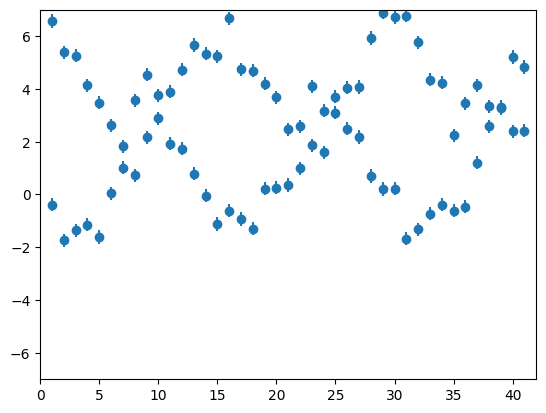

In [218]:
with open('ASTR19_S22_group_project_data.txt') as f:
    lines = f.readlines()[3:]
    
    x = [int(line.split()[0]) for line in lines]
    y = [line.split()[1] for line in lines]
    z = [float(line.split()[2]) for line in lines]
plt.errorbar(x,z,0.25,fmt='o')
plt.axis([0,42,-7,7])
#text_file.close()

In [219]:
def sine():
    return np.sin((x+4)/2.2)+2.5

Text(0, 0.5, 'y')

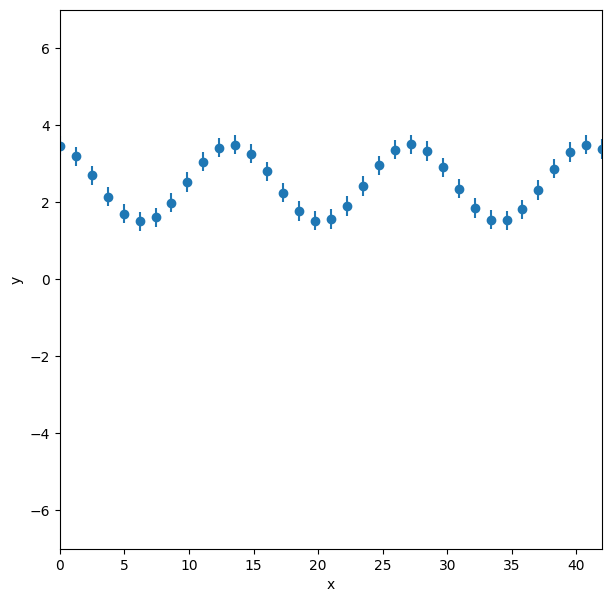

In [220]:
x_1 = np.linspace(0.,42, 35)
a = 4.0
b = 2.2
c = 2.5
sig = 0.25

y_1 = np.sin((x_1+a)/b) + c
y_err = np.full(35, sig)
f = plt.figure(figsize=(7,7))
plt.axis([0,42,-7,7])
plt.errorbar(x_1,y_1,yerr=y_err,fmt='o')
plt.xlabel('x')
plt.ylabel('y')

In [221]:
def f_line(x,a,b,c):
    return np.sin((x + a)/b) + c

params, params_cov = optimize.curve_fit(f_line,x_1,y_1,sigma=y_err,p0=[1,2.,0.1])

a_fit = params[0]
b_fit = params[1]
c_fit = params[2]

y_fit = np.sin((x + a_fit)/b_fit) + c_fit

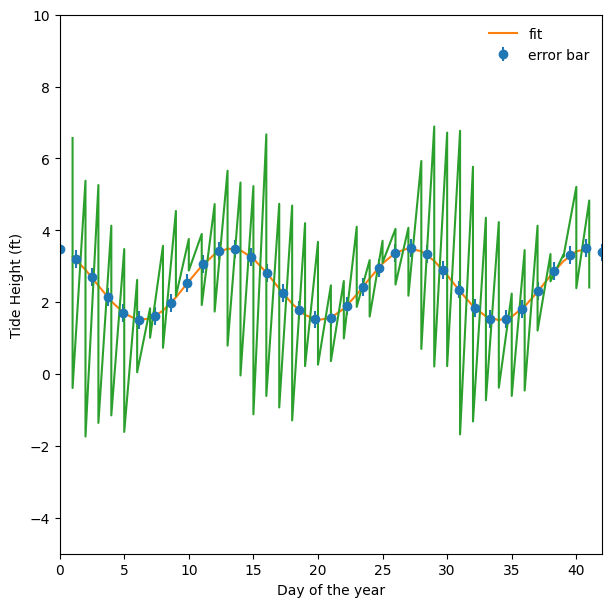

In [222]:
f = plt.figure(figsize=(7,7))
plt.errorbar(x_1,y_1,yerr=y_err,fmt='o',label='error bar')
plt.plot(x,y_fit,label='fit')
plt.xlabel('Day of the year')
plt.ylabel('Tide Height (ft)')
plt.axis([0,42,-5,10])
plt.legend(loc=0,frameon=False)
plt.plot(x,z)
plt.savefig('tide_height_fit.pdf') 

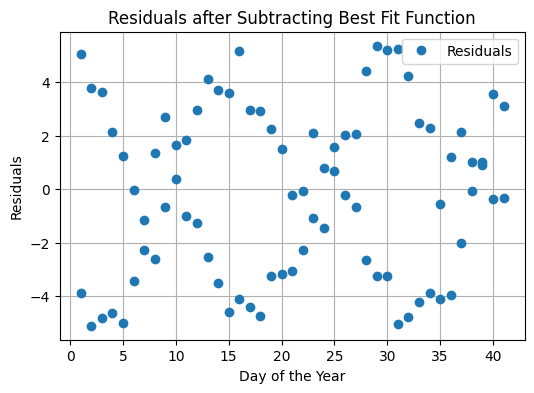

In [223]:
import tensorflow as tf

z = np.array(z)
idx_model = np.argsort(x)
y_data = z[idx_model]
y_model = np.sin((z[idx_model] + a_fit)/b_fit) + c_fit

#subtract the best fit from the data 
residuals = y_data - y_model

#plotting the residuals 
plt.figure(figsize=(6, 4))
plt.plot(x, residuals, 'o', label='Residuals')
plt.xlabel('Day of the Year')
plt.ylabel('Residuals')
plt.title('Residuals after Subtracting Best Fit Function')
plt.legend() 
plt.grid(True)
plt.show() 

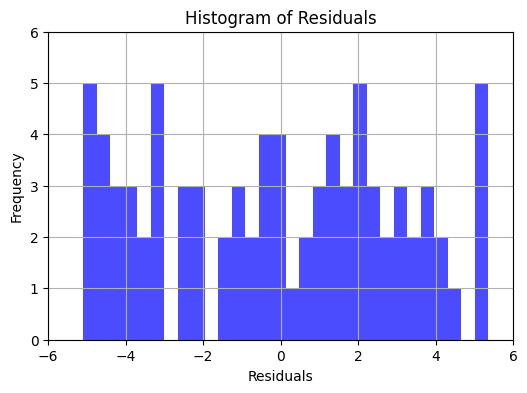

Standard Deviation of Residuals: 3.082


<Figure size 640x480 with 0 Axes>

In [224]:
#plot histogram of residuals 
plt.figure(figsize=(6, 4))
plt.hist(residuals, bins=30, color='blue', alpha=0.7)
plt.axis([-6,6, 0,6])
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.show()
plt.savefig('histogramofresiduals.pdf')


#calculate the standard deviation of residuals
residuals_std = np.std(residuals)
print(f'Standard Deviation of Residuals: {residuals_std:.3f}')

In [225]:
#is the scatter in the data larger than the assumed experimental error? 
if residuals_std > 0.25:
    print("The scatter in the data is larger than the assumed experimental error.")
else:
    print("The scatter in the data is not larger than the assumed experimental error.")

#estimate intrinsic scatter in the data after accounting for the assumed measurement error
intrinsic_scatter = np.sqrt(residuals_std**2 - 0.25**2)
print(f"Estimated Intrinsic Scatter in the Data: {intrinsic_scatter:.3f}")

The scatter in the data is larger than the assumed experimental error.
Estimated Intrinsic Scatter in the Data: 3.072
